In [1]:
import numpy as np
import matplotlib.pyplot as plt

#we will also need to import operating system tools through the os package- this will allow us to interact with the filesystem
import os

In [2]:
#Define the paths to the relevant data
raster_directory = '../zhang2011/raster_data/'
object_label_file = '../zhang2011/object_labels.npy'
loc_label_file = '../zhang2011/loc_labels.npy'
        

In [3]:
object_labels = np.load(object_label_file)
loc_labels = np.load(loc_label_file)

unique_objects = np.unique(object_labels)
unique_locations = np.unique(loc_labels)

We would like to do a population level analysis. We can see that a single neuron in this case is tuned to a specific object but not to locations. How do the spiking patterns of all neurons represent objects vs. locations as a whole? To answer this we would ideally like to see how close the responses are within and across objects and do the same analysis with locations. The first step in this will be to create a 420xnum_neuron array  called sum_all_neurons where sum_all_neurons[i, j] is the total spike count for trial i and neuron j. . 

In [4]:
#Before doing this let's take a little detour to talk about file loading

# To loop through all files in a directory we can do

for f in os.listdir(raster_directory):
    raster_array = np.load(raster_directory + f)
    #print(f)
    
#notice these are not ordered because the filesystem doesn't order the files 1-100
num_neurons = len(os.listdir(raster_directory))
print(num_neurons)

125


In [5]:

population_data = np.zeros((420,125))
j=0
for f in os.listdir(raster_directory):
    raster_arr = np.load(raster_directory + f)
    sum_all_spikes = np.sum(raster_arr[:,500:], axis = 1)
    population_data[:,j] = sum_all_spikes
    j+=1
    

#What is the size of population_data?
print(population_data.shape)
print(population_data[0])

(420, 125)
[15.  0.  0.  4.  5.  0.  9.  2.  1.  5.  1. 10.  1.  3.  3.  2.  0.  4.
  0.  0.  0.  4.  0.  7.  4.  2.  0. 25.  2.  4.  8.  2.  1.  1.  4.  2.
  1. 13.  1.  1.  1.  4.  0.  7.  2.  2.  0.  1.  0.  2.  1.  8.  2. 12.
  6.  5.  6.  6.  1. 20.  2.  0.  0. 12.  2.  0.  9.  4.  0. 10.  4.  0.
  0.  5.  2.  1.  0.  2.  0.  8. 13.  0.  1.  2.  2.  0.  2.  3.  8.  2.
  0. 13.  7.  0. 11.  0. 11. 20.  6.  7.  2.  4.  5.  2.  3.  0.  3. 10.
  9. 10.  5.  0.  0.  0.  1.  4.  2.  1.  4.  0.  2.  2.  1.  6.  8.]


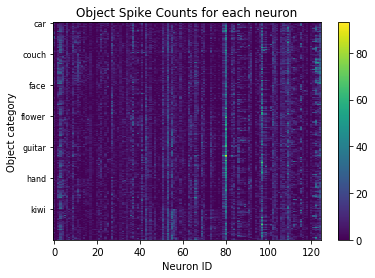

In [6]:
#Are there patterns in total firing?
#population_data = np.delete(population_data, inds, axis=1)
plt.imshow(population_data, aspect = 'auto')
plt.title('Object Spike Counts for each neuron')
plt.ylabel('Object category')
plt.xlabel('Neuron ID')#
plt.yticks(np.arange(0, 420,60), unique_objects, fontsize=8);
plt.colorbar()

It's hard to see many patterns here, but we can tell that each neuron have different average firings across all objects. Now we would like to see how the spike counts are correlated across object categories. 

To do this we want to first create a function that returns a 21 x num_neurons data array called averaged_data. averaged_data[i,j] has the average total spikes for neuron j for object/location i. For example, if the first object location pair is (car, lower) then the first row has the spike counts for all neurons averaged across all trials of (car, lower). Therefore, the total number of rows is reduced from 420 to 21. 

Our function also will either order the rows by object categories or by location categories. 

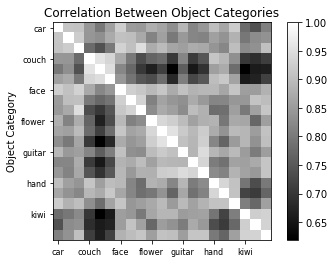

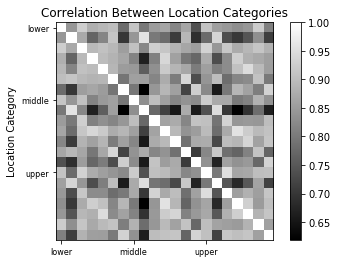

In [7]:
def create_averaged_data(data, labels1, labels2):
    averaged_data = np.zeros((21,data.shape[1]))
    unique_labels1 = np.unique(labels1)
    unique_labels2 = np.unique(labels2)
    index = 0
    
    #Whichever label array is labels1 will determine the order of the rows of the averaged data
    #i.e. if object_labels is labels1, the rows will average over locations and be ordered by objects and vice versa
    for i in range(len(unique_labels1)):
        for j in range(len(unique_labels2)):
            inds = (labels1 == unique_labels1[i]) & (labels2 == unique_labels2[j])
            averaged_data[index,:] = np.mean(data[inds],axis=0)
            index = index + 1
    
    return averaged_data

#First plot Correlation Between object categories then locations
averaged_dat_object = create_averaged_data(population_data, object_labels, loc_labels)
averaged_dat_locations = create_averaged_data(population_data, loc_labels, object_labels)

plt.imshow(np.corrcoef(averaged_dat_object), cmap='gray') 
plt.colorbar()
plt.title('Correlation Between Object Categories')
plt.ylabel('Object Category')
plt.yticks(np.arange(0, 21,3), unique_objects, fontsize=8);
plt.xticks(np.arange(0, 21,3), unique_objects, fontsize=8);

plt.show()

plt.imshow(np.corrcoef(averaged_dat_locations), cmap='gray') 
plt.colorbar()
plt.title('Correlation Between Location Categories')
plt.ylabel('Location Category')
plt.yticks(np.arange(0, 21,7), unique_locations, fontsize=8);
plt.xticks(np.arange(0, 21,7), unique_locations, fontsize=8);

plt.show()

What you should notice here is that in the object category correlation, there is a pattern of stronger correlations within the 3x3 block of squares on the diagonal because the neurons as a population are more correlated within different location presentations of the same object than different object presentations. 

On the other hand, if we look at the 7x7 block of squares on the diagonal in the location correlation plot, there are not higher correlations in these blocks because the neurons as a population are not correlated for presentations of different objects at the same location.

These two plots loosely indicate that the neurons as a population are somewhat more tuned to represent object categories distinctly but are not tuned to represent differences in object location presentation. 